# Class 4: Brightness and Contrast Adjustment

## Preliminaries

Run the cell below to download the course library and class resources.

In [75]:
import gdown

gdown.download(id='1SzvuBYIZ407c9eOChXD48NG94v7azJby')
gdown.download(id='1k1muB_Eegi01HfipsPN6q6DZMhfg80GK')

!unzip -o '04.zip'
!rm '04.zip'

Downloading...
From (original): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby
From (redirected): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby&confirm=t&uuid=ffea29ae-be25-4703-b562-820d1048bbe9
To: /content/sdx.py
100%|██████████| 2.83k/2.83k [00:00<00:00, 7.90MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k1muB_Eegi01HfipsPN6q6DZMhfg80GK
To: /content/04.zip
100%|██████████| 275k/275k [00:00<00:00, 66.2MB/s]

Archive:  04.zip
  inflating: basement.png            
  inflating: insper.png              
  inflating: insper-low.png          
  inflating: insper-lower.png        


Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [76]:
import numpy as np
import cv2 as cv

from sdx import *

## Loading and displaying the image... with a twist

We will, yet again, use that Insper panoramic image, but this time passing the parameter `asfloat=True` to `cv_grayread`.

In [77]:
insper = cv_grayread('insper.png', asfloat=True)

This parameter ensures that the image is read as an array of 64-bit floats instead of 8-bit ints. *(notice the dots)*

In [78]:
insper

array([[197., 198., 199., ..., 194., 194., 195.],
       [198., 198., 196., ..., 195., 193., 194.],
       [197., 197., 196., ..., 196., 193., 194.],
       ...,
       [182., 182., 179., ...,  67.,  61.,  66.],
       [187., 187., 181., ...,  80.,  76.,  76.],
       [187., 186., 183., ...,  91.,  94.,  97.]])

This will be particularly useful to process pixels without worrying about the `[0, 255]` bounds and non-integer arithmetic. You don't need to worry about converting back either, because the `cv_imshow` function conveniently truncates the pixels before displaying.

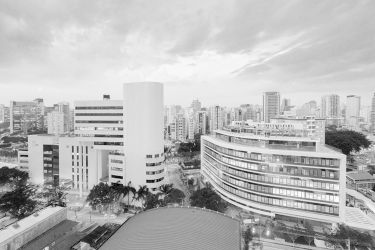

In [79]:
cv_imshow(insper)

This time, however, we will not convert it to gray level. We will consider the original, three-dimensional array. The third dimension represents the color channels. As we have discussed in the briefing, there are three.

## Activity 1: brightness adjustment

Write a function that receives an image and an integer and returns the result of summing the integer to each pixel.

**Challenge 1a:** even if you technically don't need to worry about the `[0, 255]` bounds, ensure that the result respects them.

**Challenge 1b:** do not use loops.

In [80]:
def adjust_brightness(image, b):
    return np.clip(image.copy() + b, 0, 255)

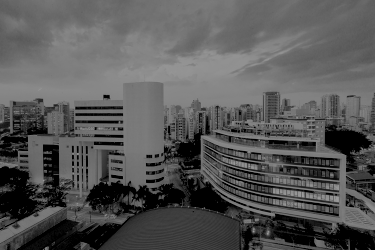

In [81]:
cv_imshow(adjust_brightness(insper, -100)) # this cell should show a version with lower brightness

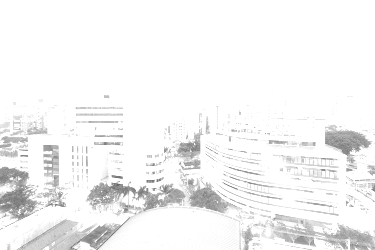

In [82]:
cv_imshow(adjust_brightness(insper, 100)) # this cell should show a version with higher brightness

## Activity 2: contrast adjustment

Write a function that receives an image and a float and returns the result of multiplying each pixel by the float. However:

* before doing so, you need to subtract the original mean of the gray levels from each pixel;

* after doing so, you need to add the original mean of the gray levels to each pixel.

**Challenge 2a:** even if you technically don't need to worry about the `[0, 255]` bounds, ensure that the result respects them.

**Challenge 2b:** even if you technically don't need to worry about the decimal places, ensure that the result is rounded.

**Challenge 2c:** do not use loops.

In [83]:
def adjust_contrast(image, a):
    copy = image.copy()
    m = np.mean(copy)
    copy = copy - m
    copy = copy * a
    return np.clip(np.round(copy + m), 0, 255)


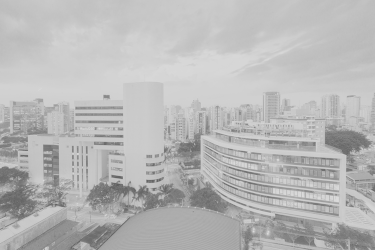

In [84]:
cv_imshow(adjust_contrast(insper, 0.5)) # this cell should show a version with lower contrast but NOT lower brightness

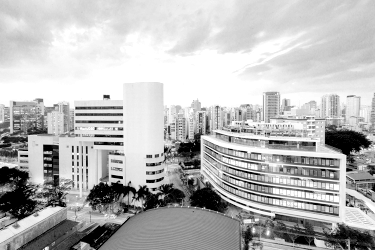

In [85]:
cv_imshow(adjust_contrast(insper, 1.5)) # this cell should show a version with higher contrast but NOT higher brightness

## Optimal contrast

Manual contrast adjustment works, but requires you to estimate an adequate constant.

An interesting alternative is **optimal contrast**: normalize the gray levels such that the original minimum value is mapped to `0` and the original maximum value is mapped to `255`.

### Activity 3

Write a function that implements optimal contrast.

Use the three images below to test the function: a correct implementation should produce a visually similar result for all of them.

In [86]:
def optimal_contrast(image):
    copy = image.copy()
    return  255 * (copy - copy.min()) / (copy.max() - copy.min())

In [87]:
lower = cv_grayread('insper-lower.png', asfloat=True)
low = cv_grayread('insper-low.png', asfloat=True)

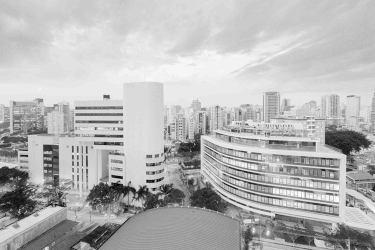

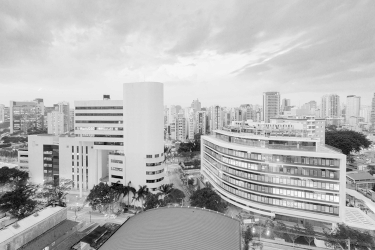

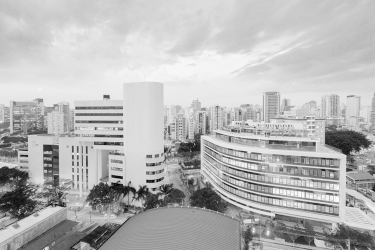

In [88]:
cv_imshow(optimal_contrast(lower))
cv_imshow(optimal_contrast(low))
cv_imshow(optimal_contrast(insper))

### Activity 4

The image below is a picture of a very dark basement. It has actually much more details than it seems at a first glance.

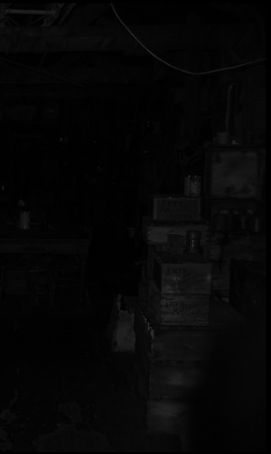

In [89]:
basement = cv_grayread('basement.png', asfloat=True)

cv_imshow(basement)

Optimal contrast produces an interesting result, but not necessarily the best one in terms of extracting information.

Edit the cell below in order to produce an image that reveals more details. Use any of the previous functions.

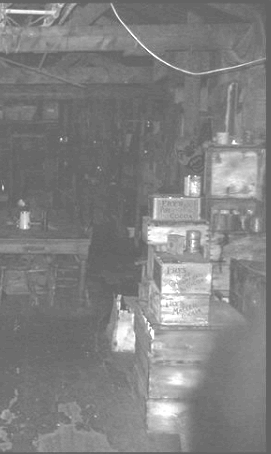

In [90]:
cv_imshow(adjust_brightness(optimal_contrast(basement), 100))

## Local contrast

The effectiveness of optimal contrast in the basement image is hindered by the fact that bright pixels *do exist*. There are only a few of them, but only a *single one* is enough to increase the difference between the minimum and maximum. In other words, there is not much space to stretch.

In order to work around this, we can adjust a **region of interest** instead of the entire image.

We already used OpenCV image slices in Class 1, but not to their full potential. A NumPy array slice is very useful because *it is a reference to the original array and not just a copy.* This means that *all modifications made to a slice are reflected in the original array.*

Notice how the code below is more effective in enhancing the details of the table in the background.

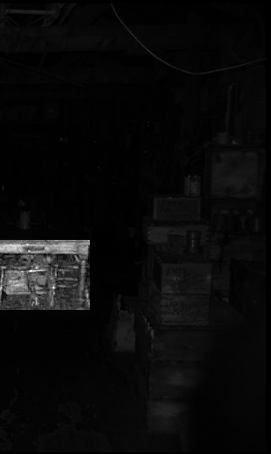

In [91]:
output = basement.copy()

roi = output[240:310, 0:90]

roi[:] = optimal_contrast(roi)

cv_imshow(output)

### Challenge 3

There's an... uh... interesting thing hidden in the basement. Try to use local optimal contrast to find it.

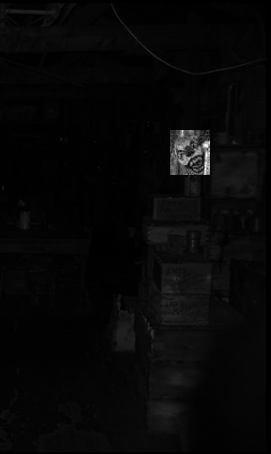

In [92]:
#clown
output = basement.copy()

roi = output[130:175, 170:210]

roi[:] = optimal_contrast(roi)

cv_imshow(output)

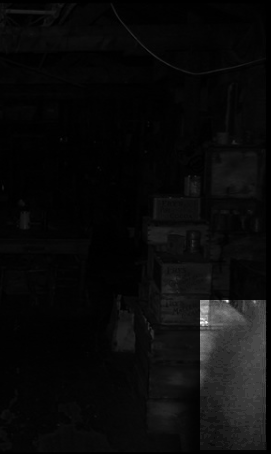

In [104]:
#thumb
output2 = basement.copy()

roi2 = output2[300:450, 200:350]

roi2[:] = optimal_contrast(roi2)

cv_imshow(output2)

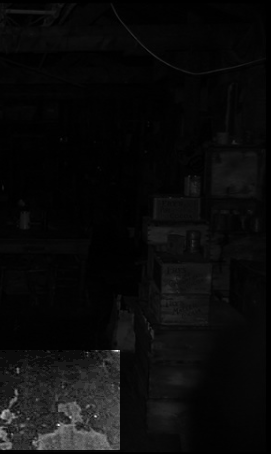

In [107]:
#blood?
output3 = basement.copy()

roi3 = output3[350:450, 0:120]

roi3[:] = optimal_contrast(roi3)

cv_imshow(output3)

You can click on the toc.png tab to the left to browse by section.